# ASSIGNMENT 2                                                McGill COMP451 - Fall 2022
Student name (ID)

If you discussed solutions with any of your classmates please list their name here. If you used any external sources also acknowledge them here.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from IPython.core.debugger import set_trace #this is used for debugging
np.random.seed(1234) 

## Problem 1. Model Complexity and Bias-Variance Trade-Off (2 pts)
Jane works at the emergency room of a hospital and wants to help the triage by training a classifier to help decide the urgency of patient care for incoming patients using multinomial logistic regression. She collects the patient data (blood pressure, temperature etc.) and their classes (urgency levels 1-3) over five days giving her 1000 instances. After training the model on her data, she observes a very high training error of 70%. Her colleague advises her to gather data for more triage patients and retrain the model with at least 10 times more data. Should Jane take her colleague's advice? Justify your answer.

### Solution
No. Her model's performance on train set is very bad which observes a very high trianing error of 70%.This indicates her model has high bias, maybe model she applied is too simple. So, before collect more data, I suggest her to apply a more complex model.

## Problem 2. Convexity of Logistic Regression's Cost Function (2 pts)
As we saw in the class, to fit a logistic regression model to the data $\mathcal{D} = \{x^{(1)}, \ldots, x^{(N)}\}$, we maximize the **logarithm of the conditional likelihood**:

$$
LL(w; \mathcal{D}) = \sum_n \log \mathrm{Bernoulli}(y^{(n)} | \sigma({w^\top x^{(n)}} )) = \sum_n y^{(n)} \log \sigma({w^\top x^{(n)}}) + (1-y^{(n)}) \log (1-\sigma(w^\top {x^{(n)}}))
$$
by substituting the definition of logistic function in the equation above, and adding a negation we get simplified NLL objective:
$$
NLL(w) = \sum_n y^{(n)} \log(1+e^{-w^\top x}) + (1-y^{(n)}) \log(1+e^{w^\top x})
$$

**Prove that the function $\log (1+ e^{a})$ is convex in $a$.** Using the fact that a composition of a convex and a linear function is convex, conclude that the logistic regression's objective above is convex.

### Solution
$$\log (1+e^{a})=-\log (\frac{1}{1+e^{a}})=-\log (\frac{1}{1+e^{-a}}e^{-a})=a-\log (\frac{1}{1+e^{-a}})$$
$$Since \space f(x)=\frac{1}{1+e^{-x}}\space is \space convex \space and \space f(x)=x \space and \space f(x)=\log (x) \space is \space linear$$<br>
$$a-\log (\frac{1}{1+e^{-a}}) \space is \space convex$$<br>
$$\log (1+e^{a}) \space is \space convex$$

## Problem 3. Gradient Calculation (8 pts)
In this assignment we want to calculate the gradient for softmax regression, and provide an implementation. This implementation will be used in the next problem for digits classification. 

### 3.a) Jacobian of the softmax (2 pts)
Consider the the softmax function $\mu_k = \mathcal{S}(a)[k] = \frac{e^{a_k}}{\sum_i e^{a_i}}$. 
Show that the element (k,j) of its Jacobian is given by 
$$\frac{\partial \mu_{k}}{\partial a_j} = \mu_k (\delta_{k j} - \mu_j)$$ 
where $\delta_{k,j} = \mathbb{I}(j = k)$. 

#### Solution 3.a)
$$\mu_k = \mathcal{S}(a)[k] = \frac{e^{a_k}}{\sum_i e^{a_i}}$$
$$\frac{\partial \mu_{k}}{\partial a_j} = -\frac{e^{a_k}e^{a_j}}{(\sum_i e^{a_i})^{2}} = -\mu_{k}\frac{e^{a_j}}{\sum_i e^{a_i}}=-\mu_{k}\mu_{j}(j \neq k)$$
$$\frac{\partial \mu_{k}}{\partial a_j} = \frac{\partial \mu_{k}}{\partial a_k} = \frac{e^{a_k}\sum_i e^{a_i} - e^{a_k}e^{a_k}}{(\sum_i e^{a_i})^{2}} = \mu_{k} - \mu_{k}\mu_{k}= \mu_{k} - \mu_{k}\mu_{j} =  \mu_k (\delta_{k j} - \mu_j)(j = k)$$
$$So \space \frac{\partial \mu_{k}}{\partial a_j} = \mu_k (\delta_{k j} - \mu_j)$$ 
where $\delta_{k,j} = \mathbb{I}(j = k)$ $\delta_{k,j} = \mathbb{0}(j \neq k)$. 

### 3.b) Derivative of the Cost Function (4 pts)
Use the above result calculate the derivative of the negative of the average log-likelihood (cross entropy loss) $\mathcal{L}$ with respect to the weights in softmax regression $\frac{\partial \mathcal{L}}{\partial w_j}$. For simplicity we ignore the bias parameter. Recall
$$\mathcal{L} = \frac{1}{N} \sum_{n=1} \sum_{c=1} y^{(n)}_c \log \mu^{(n)}_c$$
where $n$ refers to an instance, and $c$ refers to a class. Here, $y$ is the one-hot encoding of the true label. For derivation you can use the chain rule, that is you need to substitute the equation for each term and simply the following expression.
$$
\frac{\partial \mathcal{L}}{\partial W_{d c}} = 
\frac{1}{N} \sum_{n} \sum_{k} \frac{\partial \mathcal{L}}{\partial \mu^{(n)}_k} \frac{\partial \mu^{(n)}_k}{\partial a^{(n)}_c} \frac{\partial a^{(n)}_c}{\partial W_{d c}}
$$
where $c$ and $k$ index classes, and $d$ indexes the features.

#### Solution 3.b)
$$\frac{\partial \mathcal{L}}{\partial \mu^{(n)}_k}=\frac{y^{(n)}_k}{\mu^{(n)}_k}$$
$$ \frac{\partial \mu^{(n)}_k}{\partial a^{(n)}_c} = \mu^{(n)}_k (\delta_{k j} - \mu^{(n)}_c)$$
$$\frac{\partial a^{(n)}_c}{\partial W_{d c}}=X_{nd}$$
$$\frac{\partial \mathcal{L}}{\partial W_{d c}} = 
\frac{1}{N} \sum_{n} \sum_{k} \frac{\partial \mathcal{L}}{\partial \mu^{(n)}_k} \frac{\partial \mu^{(n)}_k}{\partial a^{(n)}_c} \frac{\partial a^{(n)}_c}{\partial W_{d c}}=\frac{y^{(n)}_k}{\mu^{(n)}_k}\mu^{(n)}_k (\delta_{k j} - \mu^{(n)}_c)X_{nd}=y^{(n)}_k(\delta_{k j} - \mu^{(n)}_c)X_{nd}$$

### 3.c) Implementation of the Gradient (2pts) 
Implement the gradient function above in the code below. Note that the above derivation was for the partial derivative to the element $W_{d c}$ of the $D \times C$ weight matrix $W$. Below we want the entire gradient, in the form of a matrix, the same shape as $W$. Note that although gradient is generally in the form of a vector, here, for convenience we are keeping its shape the same as the weight matrix, rather than converting it to a vector. Since you are going to use this implementation in the next question, here we provide the mathematical expression for the gradient when using the design matrix $X$, and the one-hot coding of labels $y$:

$$
 g = \frac{1}{N} X^\top (\mathcal{S}(X W) - y) 
$$

Additionally, you can check the correctness of your impelemtation using the method explained in the [optimization tutorial](https://github.com/mravanba/comp451/blob/main/Optimization.ipynb)

In [2]:
def softmax(z):
    ''' 
    calculate the softmax function along the last dimension
    '''
    z0 = np.max(z,-1, keepdims=True) 
    z_exp = np.exp(z - z0) #to prevent underflow/overflow
    p = z_exp / np.sum(z_exp, -1, keepdims=True)
    return p

def cost(
    x, # N x D 
    yhot, # N x C: one hot coding of the labels
    w # D x C
        ):
    N, D = x.shape                    
    p = np.softmax(x @ w)
    ce_loss = -np.mean(np.sum(yhot * np.log(p), -1)) # the cost function L discussed above
    return ce_loss

def gradient(
    x, # NxD
    yhot, # NxC
    w # DxC
        ):
    # YOUR CODE HERE >>>>>>>>>>>>>>>>>>>
    grad = x.T.dot(softmax(x.dot(w)) - yhot) / yhot.shape[0]
    # YOUR CODE HERE <<<<<<<<<<<<<<<<<<<
    return grad  # D x C matrix: the same shape as the weight matrix w


## Problem 4. Image Classification using Softmax Regression (8 pts)
In this assignment we want to implement softmax regression, including the stochastic gradient descent using momentum to fit the training data. Our training data is in the form of $8x8$ image of digits 0,1,2,...,9. Therefore each input $x$ has 64 features corresponding to pixel values. The input to our classifier is therefore a vector of length 64, and the output is class probabilities. Let's load this dataset and split the data into train and test.

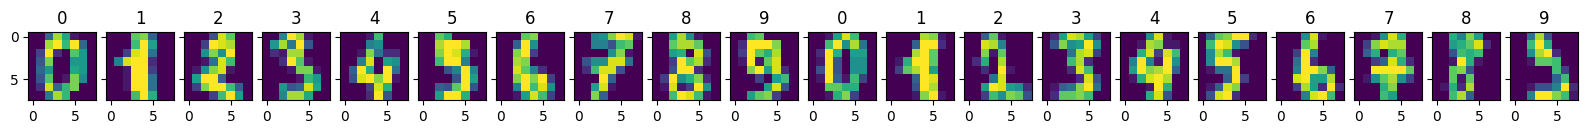

In [3]:
from sklearn.datasets import load_digits
from mpl_toolkits.axes_grid1 import ImageGrid                         #To plot the images in grid and we have seen it befoer 

x, y = load_digits(return_X_y=True)
split = (80,20) # percentage for train, and test split
n = x.shape[0]
n_tr, n_ts = n*split[0]//100, n*split[1]//100
x_tr, x_ts = x[:n_tr], x[n_tr:n_tr+n_ts] 
y_tr, y_ts = y[:n_tr], y[n_tr:n_tr+n_ts] 

def plot_digits(x,y):
    num_plots = x.shape[0]
    fig = plt.figure(figsize=(num_plots, 10.*num_plots))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, num_plots), axes_pad=0.1)
    for i in range(num_plots):
        grid[i].imshow(x[i].reshape((8,8)))
        grid[i].set_title(str(y[i]))
    plt.show()
plot_digits(x[:20], y[:20])  #plot 20 first instances in the dataset 

### 4-a) Gradient Descent with Momentum (4pts)
Below you need to complete the implementation of the gradient descent using momentum. We have a class that records hyper-parameters of the optimization including learning rate and momentum parameter, as well as the gradient function `grad_fn`. Each call to the step function should update the input weight `w` by calculating the gradient and using the exponential running average of the past gradients that is stored in `m`. The updated weight `wp` is returned by the `step` method.

In [4]:
class MomentumOpt:
    '''
    Implements the method of momentum for linear regression and classification.
    Each step takes the gradient function and its arguments, including w_{t} as input, 
    updates the exponential running average of gradients and returns w_{t+1}.
    '''
    def __init__(self, grad_fn, learning_rate=.001, beta = .95):
        self.grad_fn = grad_fn # the gradient function: grad_fn(x,y, w)
        self.learning_rate = learning_rate
        self.beta = beta
        self.m = None #the exponential running average of gradients
            
    def step(
        self, 
        x, # N x D 
        yhot, # N x C
        w # D+1 is the w at current time step. The first element w_0 is the bias and the rest are the weights 
        ):
        # YOUR CODE HERE >>>>>>>>>>
        grad = self.grad_fn(x, yhot, w)
        if self.m is not None:
            m_grad = self.beta * self.m + (1 - self.beta) * grad
        else:
            m_grad = grad
        self.m = m_grad
        wp = w - self.learning_rate * m_grad
        # YOUR CODE HERE <<<<<<<<<<<
        return wp #new updated weight

### 4-b) Training Using Mini-Batch of Data (4pts)
Now, we are ready to implement the `SoftmaxRegression` class. As before, we have two methods, `fit`, which fits the training data by finding the model parameter `w` that minimizes the empirical risk, and the `predict` method which produces class probabilities for a given input.

Here, for the training we want to use mini-batch of size `minibatch`. Each gradient step that is performed using the optimizer `step` function that you previously implemented, should therefore use a minibatch rather than the entire trainin data for its calculations. When training using mini-batch we use the term `epoch` rather than *iteration* to refer to several iterations using mini-batch that covers the entire training data once. In the implementation below you need to add the steps necessary to update the model parameter using a mini-batch of the data.

In [5]:
def onehot(x, C=None): 
    if C is None:
        C = np.max(x) + 1
    N = x.shape[0]
    x_hot = np.zeros((N,C))
    x_hot[np.arange(N), x] = 1 #use the value of x to index the last dimension
    return x_hot 

class SoftmaxRegression:

    def __init__(self, max_epochs = 1000, eps = 1e-3, minibatch=64):
        self.max_epochs = max_epochs 
        self.eps = eps
        self.b = minibatch
        self.w = None # weights

    def fit(self, x, y, optimizer):
        yhot = onehot(y)
        D, C = x_tr.shape[1], yhot.shape[1] 
        self.w = np.zeros((D,C))        
        for epoch in range(self.max_epochs): 
            w_old = self.w
            for i in range(n_tr//self.b): # update the weights using i'th mini-batch
                #YOUR CODE HERE >>>>>>>>>>>>>>>>>>>>
                self.w = optimizer.step(x[i*self.b: (i+1)*self.b, :], yhot[i*self.b: (i+1)*self.b, :], self.w)
                #YOUR CODE HERE <<<<<<<<<<<<<<<<<<<
            if np.linalg.norm(self.w - w_old) < self.eps: # check for convergence
                print(f'converged after {epoch} epochs!')
                break
        return self

    def predict(self, x):
        p = softmax(x @ self.w)  #predict probabilities 
        return p

Next, print the training and test accuracy of the model using default hyper-parameters. Plot the confusion matrix on the test set (using either `scikit-learn` implementation or the one provided in the [Model Selection Tutorial](https://github.com/mravanba/comp451/blob/main/ModelSelection.ipynb), and briefly explain what it tells you about the mistakes of the model.

converged after 514 epochs!


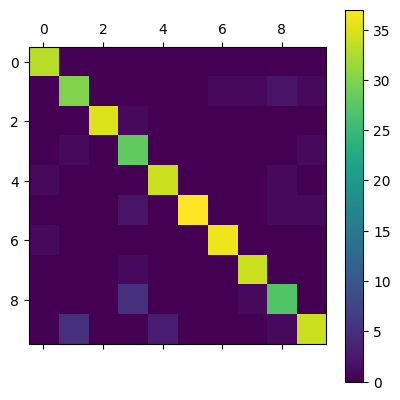

training accuracy: 0.9972164231036882 
test accuracy 0.9136490250696379


In [6]:
# YOUR CODE HERE >>>>>>>>>>>>>>>>>>>>>>
from sklearn.metrics import confusion_matrix, accuracy_score
model = SoftmaxRegression()
optimizer = MomentumOpt(grad_fn=gradient)
model.fit(x_tr, y_tr, optimizer)
tr_preds = np.argmax(model.predict(x_tr), axis=1)
ts_preds = np.argmax(model.predict(x_ts), axis=1)
acc_tr = accuracy_score(tr_preds, y_tr)
acc_ts = accuracy_score(ts_preds, y_ts)
conf_mat = confusion_matrix(ts_preds, y_ts)
plt.matshow(conf_mat, interpolation='nearest')
plt.colorbar()
plt.show()
# YOUR CODE HERE <<<<<<<<<<<<<<<<<<<<<< 
print(f'training accuracy: {acc_tr} \ntest accuracy {acc_ts}')

### Solution


The performance gap between the model in the training set and the test set is relatively large, with an accuracy difference of 8 points, which may be due to the overfitting of the model in the training process.